<a href="https://colab.research.google.com/github/Kushagrasaxena11/CNN-Model-to-Predict-Human-and-Horse/blob/main/Predict_Human_or_human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install tensorflow-datasets


In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds  # Import TensorFlow Datasets
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [5]:
(train_data, test_data), info = tfds.load('horses_or_humans', split=['train[:80%]', 'train[80%:]'], with_info=True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteSAKDT2/horses_or_humans-train.tfrecord*..…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteSAKDT2/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [11]:
# Step 2: Preprocess the data
# Preprocess the new image
def preprocess_img(image):
    image = tf.image.resize(image, (150, 150))  # Resize the image
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
    return image


In [7]:
# Step 3: Build the CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output layer
])

In [8]:
# Step 4: Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_data.shuffle(1000).batch(32),
                    epochs=20,
                    validation_data=test_data.batch(32),
                    callbacks=[early_stop])


Epoch 1/20
26/26 [==============================] - 11s 95ms/step - loss: 0.3954 - accuracy: 0.7956 - val_loss: 0.0913 - val_accuracy: 0.9707
Epoch 2/20
26/26 [==============================] - 1s 18ms/step - loss: 0.1007 - accuracy: 0.9672 - val_loss: 0.0630 - val_accuracy: 0.9854
Epoch 3/20
26/26 [==============================] - 1s 18ms/step - loss: 0.0400 - accuracy: 0.9891 - val_loss: 0.0254 - val_accuracy: 0.9902
Epoch 4/20
26/26 [==============================] - 1s 18ms/step - loss: 0.0509 - accuracy: 0.9818 - val_loss: 0.0292 - val_accuracy: 0.9902
Epoch 5/20
26/26 [==============================] - 1s 18ms/step - loss: 0.0265 - accuracy: 0.9903 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 6/20
26/26 [==============================] - 1s 18ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 7/20
26/26 [==============================] - 1s 22ms/step - loss: 6.6280e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 8/

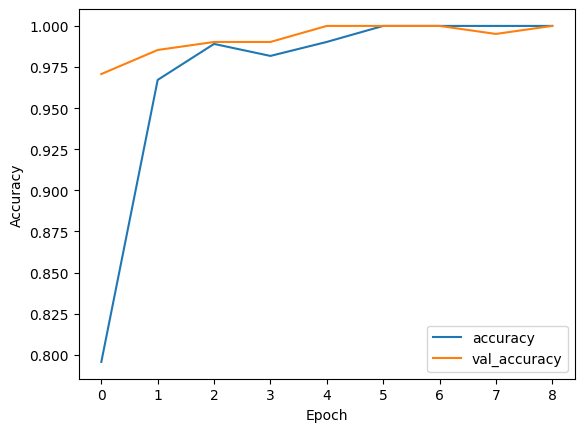

7/7 [==============================] - 0s 10ms/step - loss: 0.0028 - accuracy: 1.0000
Test accuracy: 1.0


In [9]:
# Step 5: Evaluate the model's performance
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_data.batch(32))
print(f'Test accuracy: {test_acc}')

In [12]:
# Load and preprocess the new image
new_image_path = '/content/Horse.jpeg'
new_image = tf.io.read_file(new_image_path)
new_image = tf.image.decode_image(new_image, channels=3)
new_image = preprocess_img(new_image)

In [13]:
new_image = tf.expand_dims(new_image, axis=0)

In [14]:
# Make predictions
predictions = model.predict(new_image)

1/1 [==============================] - 0s 292ms/step


In [15]:
# Get the predicted class (0 for horse, 1 for human)
predicted_class = 'human' if predictions[0][0] > 0.5 else 'horse'

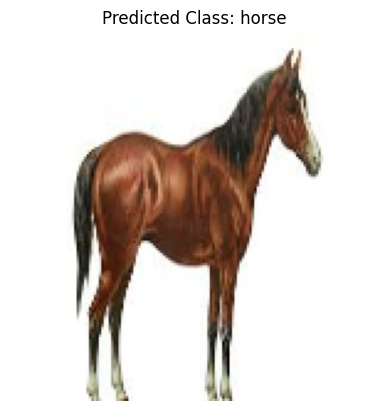

In [16]:
# Display the image and predicted class
plt.imshow(new_image[0])
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()